In [4]:
pip install torch torchvision torchaudio


  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)


In [1]:
def describe(x):
    print("타입: {}".format(x.type()))
    print("크기:{}".format(x.shape))
    print("값 \n{}".format(x))

In [2]:
import torch
describe(torch.Tensor(2,3))

타입: torch.FloatTensor
크기:torch.Size([2, 3])
값 
tensor([[2.0192e-19, 1.9856e+29, 7.1854e+22],
        [7.5554e+28, 7.5631e+28, 5.2839e-11]])


In [ ]:
#코드 1-4 랜덤하게 초기화한 텐서 만들기
import torch
describe(torch.rand(2,3)) # 균등 분포
describe(torch.randn(2,3)) # 표준 정규 분포


In [ ]:
# 코드 1-5 filled() 매서드 사용하기
import torch
describe(torch.zeros(2,3))
x = torch.ones(2,3)
describe(x)
x.fill_(5)
describe(x)

In [ ]:
# 1-6 파이썬 리스트로 텐서를 만들고 초기화하기
x = torch.Tensor([[1,2,3],[4,5,6]])
describe(x)

In [ ]:
# 1-7 넘파이로 텐서를 만들고 초기화하기
import torch
import numpy as np
npy = np.random.rand(2,3)
describe(torch.from_numpy(npy))

In [ ]:
# 1-8 텐서 속성
x = torch.Tensor([[1,2,3],
                  [4,5,6]])
describe(x)

# 정수형 타입으로 변환
x= x.long()
describe(x)

# torch.int64 타입의 텐서를 정확하게 생성하는 방법
x = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.int64)
describe(x)

# 다시 float 타입으로 변환
x= x.float()
describe(x)

#torch.tensor는 생성 시 데이터 유형을 지정할 때 사용해야 하는 생성자입니다.
#torch.Tensor (대문자 T)는 torch.FloatTensor의 별칭이며 dtype 인자를 받지 않습니다;
#torch.tensor보다 명확성과 기능성을 위해 일반적으로 사용을 피해야 합니다.

In [ ]:
# 1-9 텐서 연산: 덧셈
import torch
x = torch.randn(2,3)
describe(x)

describe(torch.add(x,x))
describe(x+x)

In [ ]:
# 1-10 차원별 텐서 연산
import torch
x= torch.arange(6)
describe(x)

x= x.view(2,3)
describe(x)


In [ ]:
# 1-11 텐서 슬라이싱과 인덱싱
import torch
x = torch.arange(6).view(2,3)
describe(x)

describe(x[:1,:2]) #1행 (0), 2열(0,1) 선택


describe(x[0,1]) # 텐서 x에서 첫 번째 행(0 행)과 두 번째 열(1 열)에 있는 요소를 선택

In [ ]:
# 1-12 복잡한 인덱싱, 연속적이지 않은 텐서 인덱스 참조하기

indices = torch.LongTensor([0,2]) # 인덱스 0과 2를 선택

describe(torch.index_select(x, dim=1, index= indices))
#dim=1은 열을 기준으로 선택하라는 의미



indices= torch.LongTensor([0,0,0])
describe(torch.index_select(x,dim=0,index=indices))
#dim=0은 행을 기준으로 선택하라는 의미

row_indices = torch.arange(2).long() # [0, 1]을 생성. 이는 첫 번째와 두 번째 행을 의미
                            #torch.float32에서 torch.int64로 변환
col_indices = torch.LongTensor([0,1]) #각 행에서 선택할 열의 인덱스를 지정합니다. 첫 번째 행에서는 0번 열, 두 번째 행에서는 1번 열이 선택됩니다.
describe(x[row_indices, col_indices])

In [ ]:
# 1-13 텐서 연결
import torch
x1= torch.arange(6).view(2,3)
describe(x)

describe(torch.cat([x,x], dim=0)) # 열

describe(torch.cat([x,x],dim=1)) # 행

describe(torch.stack([x,x]))

In [ ]:
# 1-14 텐서의 선형 대수 계산: 행렬 곱셈
import torch
x1 = torch.arange(6).view(2,3).float() # 처음에 long 으로 생성되어서
describe(x1)

x2 = torch.ones(3,2)
describe(x2)

x2[:,1]+= 1
# 두 번째 열의 모든 요소가 기존 값 1에서 1이 추가되어 2가 됩니다
describe(x2)

describe(torch.mm(x1,x2))

In [ ]:
# 1-15 그레이디언트 연산을 할 수 있는 텐서 만들기
import torch
x= torch.ones (2,2,requires_grad= True)
# 그레이디언트 기반 학습에 필요한 손실함수와 텐서의 그레이디언트를 기록하는 부가 연산 활성화
describe(x)
print(x.grad is None)

y = (x +2) *(x +5) +3
describe(y)
print(x.grad is None)

z = y.mean()
describe(z)
z.backward()
print(x.grad is None)
# False가 출력되면, 그레이디언트가 성공적으로 계산
# x 자체를 구하는 것이 아니라, x의 값을 조정해가면서 손실 함수의 값이 최소가 되는 그레이디언트(기울기)를 찾아가는 것이 목표

맨 아래에서 print(x.grad is None)가 False를 반환하는 이유는 이 시점에서 x 텐서의 그레이디언트가 계산되었기 때문입니다. x의 그레이디언트는 z.backward()를 호출함으로써 계산됩니다.

여기서 z.backward() 함수는 손실 함수(이 경우 z는 y의 평균입니다)로부터 역전파를 시작하여 각 변수의 그레이디언트를 계산합니다. x 텐서에 requires_grad=True가 설정되어 있으므로, PyTorch는 x에 대한 그레이디언트를 자동으로 추적하고 계산합니다.

프로세스의 단계는 다음과 같습니다:

텐서 x를 생성하고 그레이디언트 계산을 활성화합니다. (requires_grad=True)
y와 z를 계산합니다. 이 연산들은 x에 의존하므로, PyTorch는 연산 그래프에서 이 의존성을 추적합니다.
z.backward()를 호출하여 그레이디언트를 계산합니다. 이 함수는 z에서 x로 그레이디언트를 역전파합니다.
x.grad를 확인할 때, 이제 None이 아닙니다. 그레이디언트가 계산되었고, x.grad에 저장되어 있습니다.
따라서, print(x.grad is None)의 결과가 False로 나타나는 것은 x 텐서의 그레이디언트가 성공적으로 계산되었음을 의미합니다. 이 그레이디언트는 이제 x의 각 요소에 대한 손실 함수의 변화율을 나타냅니다.

In [ ]:
# 1-16 CUDA 텐서 만들기
import torch
print( torch.cuda.is_available())


In [ ]:
import torch

# CUDA 사용 가능 여부를 확인
if torch.cuda.is_available():
    # CUDA가 사용 가능한 경우
    print("CUDA is available! Training on GPU!")
    # CUDA 디바이스 설정
    device = torch.device("cuda")

    # CUDA 디바이스에 텐서 생성
    x = torch.ones(5, device=device)  # GPU에서 직접 텐서를 생성
    y = torch.ones(5).to(device)      # CPU에서 생성 후 GPU로 이동
    z = x + y                         # GPU에서 연산 수행
    print(z)
    print(z.to("cpu", torch.double))  # GPU에서 계산된 결과를 CPU로 이동 및 데이터 타입 변경
else:
    # CUDA가 사용 불가능한 경우
    print("CUDA is not available! Training on CPU.")
    # CPU에서 텐서 생성 및 연산
    x = torch.ones(5)
    y = torch.ones(5)
    z = x + y
    print(z)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
x = torch. rand(3,3).to(device)
describe(x)

In [ ]:
# 1-17 CUDA 텐서와  CPU 텐서 더하기
# y= torch.rand(3,3)
# x+y

cpu_device= torch.device("cpu")
y = y.to(cpu_device)  # Move y to the same device as x
x = x.to(cpu_device)
x + y


In [ ]:
# 1.5 연습문제
# https://pytorch.org/docs/stable/index.html


1.5 연습문제
문제 풀어보기는 파이토치 기초를 마스터하는 가장 좋은 방법입니다. 여기에 기초적인 문제 몇 개를 담았습니다. 문제는 대부분 공식 문서(http://bit. ly/3c7Bfyq)에서 관련 함수를 찾아 야 해결할 수 있습니다. 정답은 부록 B에 있습니다.
1. 2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하세요.
2. 이전 텐서에 추가한 차원을 삭제하세요.
3. 범위가 [3, 7)이고 크기가 5X3인 랜덤한 텐서를 만드세요.
4. 정규 분포(평균=0, 표준편차=1)를 사용해 텐서를 만드세요.
5. 텐서 torch.Tensor([1, 1. 1. 0. 11)에서 0이 아닌 원소의 인덱스를 추출하세요.
6. 크기가 (3,1)인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요.
7. 2차원 행렬 두 개(a-torch.rand(3,4.5), b-torch.rand (3,5,4))의 배치 행렬 곱셈oatch matix-matix product 을 계산하세요.
8. 3차원 행렬(a=orch.rand(3,4,5))과 2차원 행렬(b-torch.rand (5,4))의 배치 행렬 곱셈을 계산하세요

In [8]:
#1.
x = torch.ones(2,2)
describe(x)
x.unsqueeze(0)
describe(x)

타입: torch.FloatTensor
크기:torch.Size([2, 2])
값 
tensor([[1., 1.],
        [1., 1.]])
타입: torch.FloatTensor
크기:torch.Size([2, 2])
값 
tensor([[1., 1.],
        [1., 1.]])


In [12]:
import torch

# 예제 2D 텐서 생성
tensor_2d = torch.tensor([[1, 2], [3, 4]])
describe(tensor_2d)
# 차원 0 위치에 크기가 1인 차원 추가
tensor_3d = tensor_2d.unsqueeze(0)

describe(tensor_3d)

# 추가한 차원을 삭제
tensor_2d_again = tensor_3d.squeeze(0)

describe(tensor_2d_again)

타입: torch.LongTensor
크기:torch.Size([2, 2])
값 
tensor([[1, 2],
        [3, 4]])
타입: torch.LongTensor
크기:torch.Size([1, 2, 2])
값 
tensor([[[1, 2],
         [3, 4]]])
타입: torch.LongTensor
크기:torch.Size([2, 2])
값 
tensor([[1, 2],
        [3, 4]])


In [13]:
#3,4
import torch

# 범위 [3, 7)의 랜덤 텐서 생성
random_tensor = 3 + (7 - 3) * torch.rand(5, 3)
print("Random Tensor with values in [3, 7):\n", random_tensor)

# 평균 0, 표준편차 1 정규 분포 텐서 생성
normal_tensor = torch.randn(5, 3)
print("Tensor from a normal distribution (mean=0, std=1):\n", normal_tensor)


Random Tensor with values in [3, 7):
 tensor([[6.5921, 3.5474, 3.0971],
        [4.2393, 6.5226, 6.4842],
        [5.2990, 6.7380, 6.5815],
        [3.0970, 4.1277, 3.0567],
        [5.5523, 4.5236, 6.9506]])
Tensor from a normal distribution (mean=0, std=1):
 tensor([[ 0.1438,  0.1417, -0.3893],
        [ 0.5269,  0.7337, -0.7915],
        [-0.6396, -0.5090,  0.6723],
        [ 0.0204,  0.4464,  0.6653],
        [ 0.5881,  0.2165,  1.0390]])


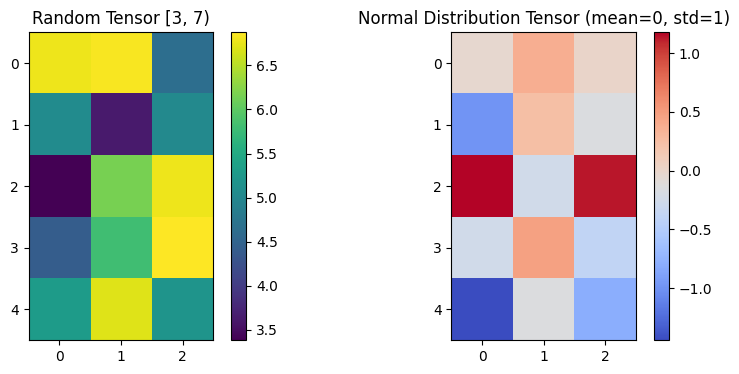

In [14]:
import torch
import matplotlib.pyplot as plt

# 범위 [3, 7)의 랜덤 텐서 생성
random_tensor = 3 + (7 - 3) * torch.rand(5, 3)

# 평균 0, 표준편차 1 정규 분포 텐서 생성
normal_tensor = torch.randn(5, 3)

# 랜덤 텐서 시각화
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(random_tensor, cmap='viridis')
plt.colorbar()
plt.title("Random Tensor [3, 7)")

# 정규 분포 텐서 시각화
plt.subplot(1, 2, 2)
plt.imshow(normal_tensor, cmap='coolwarm')
plt.colorbar()
plt.title("Normal Distribution Tensor (mean=0, std=1)")

plt.show()


In [15]:
#5.
a = torch.Tensor([1,1,1,0,1])
torch.nonzero(a)

tensor([[0],
        [1],
        [2],
        [4]])

In [16]:
#6. 크기가 (3,1)인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요.
a = torch.rand(3,1)

describe(torch.stack([a,a,a,a]))
describe(a.expand(3,4))

타입: torch.FloatTensor
크기:torch.Size([4, 3, 1])
값 
tensor([[[0.0491],
         [0.4649],
         [0.2591]],

        [[0.0491],
         [0.4649],
         [0.2591]],

        [[0.0491],
         [0.4649],
         [0.2591]],

        [[0.0491],
         [0.4649],
         [0.2591]]])
타입: torch.FloatTensor
크기:torch.Size([3, 4])
값 
tensor([[0.0491, 0.0491, 0.0491, 0.0491],
        [0.4649, 0.4649, 0.4649, 0.4649],
        [0.2591, 0.2591, 0.2591, 0.2591]])


In [17]:
a = torch.rand(3,4,5)
b= torch.rand(3,5,4)
torch.bmm(a,b)

tensor([[[1.8750, 1.9112, 1.4534, 1.3251],
         [2.2852, 2.2179, 1.8652, 1.9907],
         [1.5772, 1.3681, 1.5108, 1.3425],
         [1.3338, 1.0081, 1.2240, 1.4626]],

        [[1.1593, 1.7292, 1.5160, 1.1533],
         [1.1537, 1.6353, 1.6645, 1.1848],
         [0.9175, 1.0323, 1.4830, 0.8533],
         [0.9933, 1.9667, 1.2111, 1.1971]],

        [[1.3701, 0.6814, 1.8012, 1.9446],
         [1.2489, 0.4141, 1.9707, 1.9572],
         [1.3275, 0.3407, 2.1155, 2.2276],
         [0.9520, 0.3458, 1.4461, 1.3012]]])

In [4]:
#8.
import torch
a = torch.rand(3,4,5)
b = torch.rand(5,4)
torch.bmm(a,b.unsqueeze(0).expand(a.size(0),*b.size()))



tensor([[[1.5017, 1.7594, 1.5024, 1.6810],
         [1.0598, 1.3992, 1.2982, 1.0723],
         [1.2729, 1.7251, 1.4726, 1.5878],
         [1.1611, 1.3222, 1.0087, 1.0592]],

        [[1.4816, 1.8681, 1.6339, 1.6519],
         [2.1141, 2.4063, 1.9921, 2.2296],
         [1.0274, 1.4682, 1.4132, 1.4994],
         [1.2409, 1.7652, 1.2986, 1.4118]],

        [[1.1673, 0.9835, 0.8239, 0.6633],
         [1.7539, 2.1885, 1.6457, 1.8159],
         [1.7177, 2.1900, 1.7873, 2.1892],
         [1.0387, 1.0573, 0.9200, 1.3410]]])

In [ ]:
# 8. 3차원 행렬(a=torch.rand(3,4,5))과 2차원 행렬(b=torch.rand(5,4))의 배치 행렬 곱셈을 계산하세요
a=torch.rand(3,4,5)
b=torch.rand(5,4) # (3,5,4)

b_expand = b.unsqueeze(0).expand(3,-1,-1)
result = torch.bmm(a, b_expand)

In [5]:
a=torch.rand(3,4,5)
b=torch.rand(5,4)

torch.matmul(a,b) # expand 를 자동으로 해줌.

tensor([[[1.1669, 0.6115, 1.5129, 2.0203],
         [1.6884, 0.8881, 1.9128, 2.2832],
         [0.7238, 0.5680, 0.6563, 1.3833],
         [1.1760, 0.6660, 1.4088, 1.7761]],

        [[1.1243, 0.3828, 1.1287, 1.6349],
         [1.4687, 0.7031, 1.7388, 1.9686],
         [1.4525, 0.8665, 1.5604, 2.2730],
         [0.9867, 0.5354, 1.3080, 1.4102]],

        [[0.5389, 0.2835, 0.5667, 0.8424],
         [1.4530, 0.7222, 1.5076, 2.4949],
         [1.1205, 0.3367, 1.1367, 1.4984],
         [0.9322, 0.5131, 0.8489, 1.1527]]])